# IRISpy Spectrograph

In [96]:
from irispy.spectrograph import IRISSpectrograph
from sunpycube.cube.datacube import Cube, CubeSequence
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from irispy.data import sample
from IPython.display import HTML
sample.RASTER
%matplotlib inline
plt.rcParams.update({'figure.dpi': 100,'font.size':10})

In [97]:
sample.RASTER
testfile='/Users/shelbe/sunpy/raster/iris_l2_20170502_095734_3620250135_raster_t000_r00000.fits'

In [98]:
sg=IRISSpectrograph(testfile)

### Spectral Windows

In [99]:
sg.spectral_windows

name,detector type,brightest wavelength,min wavelength,max wavelength
,,Angstrom,Angstrom,Angstrom
str12,str4,float64,float64,float64
C II 1336,FUV1,1335.70996094,1332.75413016,1337.4528902
Fe XII 1349,FUV1,1349.43005371,1347.73305029,1350.74441032
O I 1356,FUV1,1355.59997559,1352.30201033,1356.53349037
Si IV 1394,FUV2,1393.7800293,1390.94806787,1395.95974787
Si IV 1403,FUV2,1402.77001953,1398.68182787,1406.11030787
2832,NUV,2832.89291545,2831.58172549,2834.20410541
2814,NUV,2814.61263601,2812.89408606,2816.33118595
Mg II k 2796,NUV,2796.19995117,2793.31534666,2806.55454625


In [100]:
window = sg.spectral_windows["name"]
window[0]

'C II 1336'

### Plotting Spectra

In [101]:
c=sg.data[window[0]]
si=(sg.data[window[3]],sg.data[window[4]])
mg=sg.data[window[7]]

/Users/shelbe/anaconda/envs/irispy-dev/lib/python3.6/site-packages/matplotlib/colors.py:1154: UserWarning: Power-law scaling on negative values is ill-defined, clamping to 0.
  warnings.warn("Power-law scaling on negative values is "


/Users/shelbe/anaconda/envs/irispy-dev/lib/python3.6/site-packages/matplotlib/colors.py:1108: RuntimeWarning: invalid value encountered in less
  res_mask = result.data < 0
/Users/shelbe/anaconda/envs/irispy-dev/lib/python3.6/site-packages/matplotlib/colors.py:1115: RuntimeWarning: invalid value encountered in power
  np.power(resdat, gamma, resdat)
/Users/shelbe/anaconda/envs/irispy-dev/lib/python3.6/site-packages/matplotlib/colors.py:1119: MaskedArrayFutureWarning: setting an item on a masked array which has a shared mask will not copy the mask and also change the original mask array in the future.
Check the NumPy 1.11 release notes for more information.
  result[res_mask] = 0
/Users/shelbe/anaconda/envs/irispy-dev/lib/python3.6/site-packages/matplotlib/colors.py:496: RuntimeWarning: invalid value encountered in less
  cbook._putmask(xa, xa < 0.0, -1)


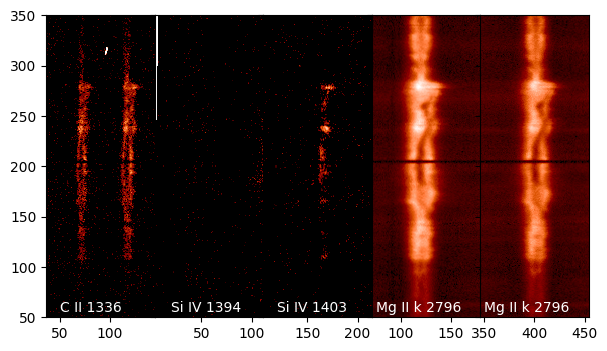

In [102]:
fig,ax =plt.subplots(1,5, figsize=(7,4),dpi=100,facecolor='w', edgecolor='k',sharey=True)
plt.subplots_adjust(hspace = .5, wspace=.001)
#Plot functions will be updated to sg.data[window].plot() for animation of whole sequence of observation or
#sg.data[window][i,j,:,:].plot() for 2D slices
c.plot_x_slice(10, cmap='irissji1330',norm=colors.PowerNorm(.4,5,50),axes=ax[0])
si[0].plot_x_slice(10, cmap='irissji1330',norm=colors.PowerNorm(.4,5,40),axes=ax[1])
si[1].plot_x_slice(10, cmap='irissji1330',norm=colors.PowerNorm(.4,5,40),axes=ax[2])
mg.plot_x_slice(10, cmap='irissji1330',norm=colors.PowerNorm(.5),axes=ax[3])
mg.plot_x_slice(10, cmap='irissji1330',norm=colors.PowerNorm(.5),axes=ax[4])
ax[0].set_ylim(50,350)
ax[1].set_xlim(25,90)
ax[2].set_xlim(120,200)
ax[3].set_xlim(75,175)
ax[4].set_xlim(350,450)
ax[0].annotate(window[0],xy=(50,55),color='white')
ax[1].annotate(window[3],xy=(20,55),color='white')
ax[2].annotate(window[4],xy=(120,55),color='white')
ax[3].annotate(window[7],xy=(75,55),color='white')
ax[4].annotate(window[7],xy=(350,55),color='white')

/Users/shelbe/anaconda/envs/irispy-dev/lib/python3.6/site-packages/matplotlib/colors.py:1154: UserWarning: Power-law scaling on negative values is ill-defined, clamping to 0.
  warnings.warn("Power-law scaling on negative values is "


/Users/shelbe/anaconda/envs/irispy-dev/lib/python3.6/site-packages/matplotlib/colors.py:1108: RuntimeWarning: invalid value encountered in less
  res_mask = result.data < 0
/Users/shelbe/anaconda/envs/irispy-dev/lib/python3.6/site-packages/matplotlib/colors.py:1115: RuntimeWarning: invalid value encountered in power
  np.power(resdat, gamma, resdat)
/Users/shelbe/anaconda/envs/irispy-dev/lib/python3.6/site-packages/matplotlib/colors.py:1119: MaskedArrayFutureWarning: setting an item on a masked array which has a shared mask will not copy the mask and also change the original mask array in the future.
Check the NumPy 1.11 release notes for more information.
  result[res_mask] = 0
/Users/shelbe/anaconda/envs/irispy-dev/lib/python3.6/site-packages/matplotlib/colors.py:1108: RuntimeWarning: invalid value encountered in less
  res_mask = result.data < 0
/Users/shelbe/anaconda/envs/irispy-dev/lib/python3.6/site-packages/matplotlib/colors.py:1115: RuntimeWarning: invalid value encountered in 

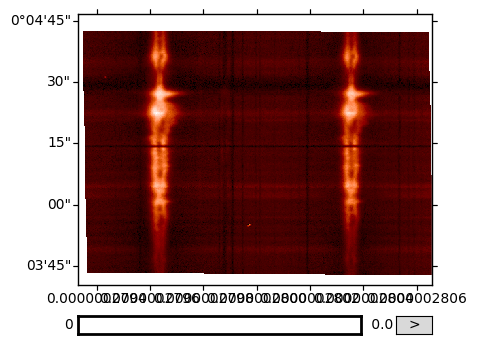

In [106]:
mg.animate(cmap='irissji1330',norm=colors.PowerNorm(.5))

### Useful functions

In [103]:
sg

<iris.IRISSpectrograph instance
OBS ID: 3620250135
OBS Description: Medium dense 16-step raster 5x60 16s  C II   Si IV   Mg II h/k   Mg
OBS period: 2017-05-02T09:57:34.760 -- 2017-05-02T11:08:14.150
Instance period: 2017-05-02 09:57:34.930000 -- 2017-05-02 09:58:08.120000
Number unique raster positions: 16
Spectral windows
    C II 1336
        (raster axis, slit axis, spectral axis) 16
    Fe XII 1349
        (raster axis, slit axis, spectral axis) 16
    O I 1356
        (raster axis, slit axis, spectral axis) 16
    Si IV 1394
        (raster axis, slit axis, spectral axis) 16
    Si IV 1403
        (raster axis, slit axis, spectral axis) 16
    2832
        (raster axis, slit axis, spectral axis) 16
    2814
        (raster axis, slit axis, spectral axis) 16
    Mg II k 2796
        (raster axis, slit axis, spectral axis) 16>

In [84]:
sg.meta

SIMPLE  =                    T / Written by IDL:  Sat May  6 00:39:45 2017      
BITPIX  =                   16 / Number of bits per data pixel                  
NAXIS   =                    0 / Number of data axes                            
EXTEND  =                    T / FITS data may contain extensions               
DATE    = '2017-05-06'         / Creation UTC (CCCC-MM-DD) date of FITS header  
COMMENT FITS (Flexible Image Transport System) format is defined in 'Astronomy  
COMMENT and Astrophysics', volume 376, page 359; bibcode 2001A&A...376..359H    
TELESCOP= 'IRIS    '           /                                                
INSTRUME= 'SPEC    '           /                                                
DATA_LEV=              2.00000 /                                                
LVL_NUM =              2.00000 /                                                
VER_RF2 = 'L12-2017-04-23'     /                                                
DATE_RF2= '2017-05-06T04:41:

In [71]:
 sg.auxiliary_data

TIME,PZTX,PZTY,FUV EXPOSURE TIME,NUV EXPOSURE TIME,SUMSPTRF,SUMSPATF,SUMSPTRN,SUMSPATN,DSRCFIX,DSRCNIX,LUTIDF,LUTIDN,XCENIX,YCENIX,OBS_VRIX,OPHASEIX,PC1_1IX,PC1_2IX,PC2_1IX,PC2_2IX,PC3_1IX,PC3_2IX,PC3_3IX,PC2_3IX,IT01PFUV,IT06TFUV,IT14SFUV,IT15SFUV,IT16SFUV,IT17SFUV,IT18SFUV,IT19SFUV,POFFXFUV,POFFYFUV,POFFFFUV,IT01PNUV,IT06TNUV,IT14SNUV,IT15SNUV,IT16SNUV,IT17SNUV,IT18SNUV,IT19SNUV,POFFXNUV,POFFYNUV,POFFFNUV,scan
s,arcsec,arcsec,s,s,,,,,,,,,arcsec,arcsec,m / s,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str5
0.17,-3.1014688015,0.6063580513,0.999118983746,0.999158024788,2.0,1.0,1.0,1.0,1.50999999046,1.50999999046,4.0,4.0,-178.338801969,253.539650808,-736.826416016,0.0966171994805,1.0,-0.0,0.0,0.999936521053,0.0,0.00536734111859,0.999936521053,-0.0236519605546,44.678188324,24.2409057617,19.0009040833,21.9090957642,18.9645252228,21.4890956879,24.5599994659,6.69000005722,-0.759999990463,14.5900001526,55.0,44.6782112122,24.2408943176,19.0008945465,21.9091053009,18.9644756317,21.4891052246,24.5599994659,6.69000005722,2.23000001907,-6.01000022888,51.0,scan0
2.43,-2.75226688385,0.607842683792,0.999100029469,0.999185025692,2.0,1.0,1.0,1.0,1.50999999046,1.50999999046,4.0,4.0,-177.988600281,253.537914028,-736.588684082,0.0970014929771,1.0,-0.0,0.0,0.999936461449,0.0,0.00536928033805,0.999936461449,-0.0236605060041,44.6774368286,24.2412815094,19.0012817383,21.9087181091,18.9664077759,21.4887180328,24.5599994659,6.69000005722,-0.759999990463,14.5900001526,55.0,44.6774597168,24.2412700653,19.0012702942,21.9087295532,18.9663505554,21.4887294769,24.5599994659,6.69000005722,2.23000001907,-6.0,51.0,scan0
4.61,-2.4030649662,0.609327018261,0.999146997929,0.999225974083,2.0,1.0,1.0,1.0,1.50999999046,1.50999999046,4.0,4.0,-177.638391917,253.536205044,-736.354003906,0.097375549376,1.0,-0.0,0.0,0.999936461449,0.0,0.00537114990356,0.999936461449,-0.0236687445134,44.6767082214,24.241645813,19.0016441345,21.9083557129,18.9682254791,21.4883556366,24.5599994659,6.69000005722,-0.759999990463,14.6000003815,55.0,44.6767311096,24.2416343689,19.0016345978,21.9083652496,18.9681758881,21.4883651733,24.5599994659,6.69000005722,2.23000001907,-5.98999977112,51.0,scan0
7.14,-2.05386257172,0.610811710358,0.999135017395,0.999180972576,2.0,1.0,1.0,1.0,1.50999999046,1.50999999046,4.0,4.0,-177.288029366,253.534590334,-736.078186035,0.0978059619665,1.0,-0.0,0.0,0.999936401844,0.0,0.00537332115501,0.999936401844,-0.0236783124452,44.6758651733,24.242067337,19.0020675659,21.9079341888,18.9703330994,21.4879341125,24.5599994659,6.69000005722,-0.759999990463,14.6099996567,55.0,44.6758918762,24.2420558929,19.0020542145,21.9079456329,18.9702758789,21.4879455566,24.5599994659,6.69000005722,2.23000001907,-5.98000001907,51.0,scan0
9.38,-1.70466065407,0.61229634285,0.999121010303,0.999182999134,2.0,1.0,1.0,1.0,1.50999999046,1.50999999046,4.0,4.0,-176.937810761,253.532884071,-735.828979492,0.0981885567307,1.0,-0.0,0.0,0.999936342239,0.0,0.0053752430719,0.999936342239,-0.0236867816484,44.6751213074,24.24243927,19.0024394989,21.9075603485,18.9722003937,21.4875602722,24.5599994659,6.69000005722,-0.769999980927,14.6099996567,55.0,44.6751441956,24.2424278259,19.0024280548,21.9075717926,18.9721412659,21.4875717163,24.5599994659,6.69000005722,2.23000001907,-5.96999979019,51.0,scan0
11.64,-1.35545837879,0.613780677319,0.999167025089,0.999221980572,2.0,1.0,1.0,1.0,1.50999999046,1.50999999046,4.0,4.0,-176.588521956,253.530534218,-735.573486328,0.0985745638609,1.0,-0.0,0.0,0.999936342239,0.0,0.0053754036753,0.999936342239,-0.0236874893703,44.6743659973,24.242816925,19.0028171539,21.9071826935,18.9740829468,21.4871826172,24.5599994659,6.690

In [79]:
sg.coord_names

('raster number', 'x', 'y', 'wavelength')

In [80]:
sg.data[window[7]].shape

(1, 16, 400, 521)

In [81]:
sg.coord_names_index_as_cube

('exposure number', 'y', 'wavelength')

In [82]:
sg.data[window[7]][0].shape

(16, 400, 521)

In [107]:
sg.len_raster_axis

AttributeError: 'IRISSpectrograph' object has no attribute 'len_raster_axis'